In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
       'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [3]:
data = pd.Series(data)

In [4]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [5]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [6]:
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [7]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [8]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [9]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

matches

In [10]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [11]:
matches.dtype

dtype('O')

In [12]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [13]:
data = pd.Series(np.random.randn(9),
                index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                      [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [14]:
data

a  1   -1.752762
   2    2.212384
   3   -1.021361
b  1    0.446151
   3    0.206792
c  1   -0.752053
   2   -0.166259
d  2   -0.699175
   3   -0.700424
dtype: float64

In [15]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [16]:
data['b']

1    0.446151
3    0.206792
dtype: float64

In [17]:
data['b':'c']

b  1    0.446151
   3    0.206792
c  1   -0.752053
   2   -0.166259
dtype: float64

In [18]:
data.loc[['b', 'd']]

b  1    0.446151
   3    0.206792
d  2   -0.699175
   3   -0.700424
dtype: float64

In [19]:
data.loc[:, 2]

a    2.212384
c   -0.166259
d   -0.699175
dtype: float64

In [20]:
data.unstack()

,1,2,3
a,-1.752762,2.212384,-1.021361
b,0.446151,NaN,0.206792
c,-0.752053,-0.166259,NaN
d,NaN,-0.699175,-0.700424


In [21]:
data.unstack().stack()

a  1   -1.752762
   2    2.212384
   3   -1.021361
b  1    0.446151
   3    0.206792
c  1   -0.752053
   2   -0.166259
d  2   -0.699175
   3   -0.700424
dtype: float64

In [22]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=[['Ohio', 'Ohio', 'Colorado'],
                            ['Green', 'Red', 'Green']])

In [23]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [24]:
frame.index.names = ['key1', 'key2']

In [25]:
frame.columns.names = ['state', 'color']

In [26]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [27]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [28]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                      names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [29]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [30]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [31]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [32]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [33]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [34]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                     'c': ['one', 'one', 'one', 'two', 'two',
                          'two', 'two'],
                     'd': [0, 1, 2, 0, 1, 2, 3]})

In [35]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [36]:
frame2 = frame.set_index(['c', 'd'])

In [37]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [38]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [39]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [40]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1': range(7)})

In [41]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                   'data2': range(3)})

In [42]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [43]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [44]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [45]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [46]:
df3 = pd.DataFrame({'1key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1': range(7)})

In [47]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                   'data2': range(3)})

In [48]:
df3

,1key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [49]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [50]:
pd.merge(df3, df4, left_on='1key', right_on='rkey')

,1key,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [51]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [52]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})

In [53]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                   'data2': range(5)})

In [54]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [55]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [56]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [57]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [58]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                    'key2': ['one', 'two', 'one'],
                    'lval': [1, 2, 3]})

In [59]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                     'key2': ['one', 'one', 'one', 'two'],
                     'rval': [4, 5, 6, 7]})

In [60]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [61]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [62]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [63]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                     'value': range(6)})

In [64]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [65]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [66]:
right1

,group_val
a,3.5
b,7.0


In [67]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [68]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [69]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                              'Nevada', 'Nevada'],
                     'key2': [2000, 2001, 2002, 2001, 2002],
                     'data': np.arange(5.)})

In [70]:
rigth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                    index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                           'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                    columns=['event1', 'event2'])

In [71]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [72]:
rigth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [73]:
pd.merge(lefth, rigth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [74]:
pd.merge(lefth, rigth, left_on=['key1', 'key2'],
        right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [75]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [76]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                    index=['a', 'c', 'e'],
                    columns=['Ohio', 'Nevada'])

In [77]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                     index=['b', 'c', 'd', 'e'],
                     columns=['Missouri', 'Alabama'])

In [78]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [79]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [80]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [81]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [82]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [83]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                      index=['a', 'c', 'e', 'f'],
                      columns=['New York', 'Oregon'])

In [84]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [85]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [86]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [87]:
arr = np.arange(12).reshape((3, 4))

In [88]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [89]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [90]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [91]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [92]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [93]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [94]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [95]:
s4 = pd.concat([s1, s3])

In [96]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [97]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [98]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [99]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [100]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [101]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [102]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [103]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [104]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                  columns=['one', 'two'])

In [105]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                  columns=['three', 'four'])

In [106]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [107]:
df2

,three,four
a,5,6
c,7,8


In [108]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [109]:
pd.concat({'level1':df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [110]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
         names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [111]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

In [112]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [113]:
df1

,a,b,c,d
0,1.427756,-0.533748,-0.017002,-0.921619
1,1.278122,-0.885811,0.090626,-0.549164
2,-0.128671,0.990226,-0.120414,1.224061


In [114]:
df2

,b,d,a
0,-1.246025,0.302744,-0.903629
1,-0.342679,-0.447109,-1.178733


In [115]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,1.427756,-0.533748,-0.017002,-0.921619
1,1.278122,-0.885811,0.090626,-0.549164
2,-0.128671,0.990226,-0.120414,1.224061
3,-0.903629,-1.246025,NaN,0.302744
4,-1.178733,-0.342679,NaN,-0.447109


In [116]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
             index=['f', 'e', 'd', 'c', 'b', 'a'])

In [117]:
b = pd.Series(np.arange(len(a), dtype=np.float64),
             index=['f', 'e', 'd', 'c', 'b', 'a'])

In [118]:
b[-1] = np.nan

In [119]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [120]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [121]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [122]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [123]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                   'b': [np.nan, 2., np.nan, 6.],
                   'c': range(2, 18, 4)})

In [124]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                   'b': [np.nan, 3., 4., 6., 8.]})

In [125]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [126]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [127]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [128]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                   index=pd.Index(['Ohio', 'Colorado'], name='state'),
                   columns=pd.Index(['one', 'two', 'three'],
                                   name='number'))

In [129]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [130]:
result = data.stack()

In [131]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [132]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [133]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [134]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [135]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

In [136]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

In [137]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [138]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [139]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [140]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [141]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [142]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                 columns=pd.Index(['left', 'right'], name='side'))

In [143]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [144]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [145]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [146]:
data = pd.read_csv('/users/karolkul/temp/pytand/przyklady/macrodata.csv')

In [147]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [148]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                        name='date')

In [149]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [150]:
columns = pd.Index(['realdp', 'infl', 'unemp'], name='item')

In [151]:
columns

Index(['realdp', 'infl', 'unemp'], dtype='object', name='item')

In [152]:
data = data.reindex(columns=columns)

In [153]:
data.index = periods.to_timestamp('D', 'end')

In [154]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [155]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,infl,0.00
1,1959-03-31 23:59:59.999999999,unemp,5.80
2,1959-06-30 23:59:59.999999999,infl,2.34
3,1959-06-30 23:59:59.999999999,unemp,5.10
4,1959-09-30 23:59:59.999999999,infl,2.74
...,...,...,...
401,2009-03-31 23:59:59.999999999,unemp,8.10
402,2009-06-30 23:59:59.999999999,infl,3.37
403,2009-06-30 23:59:59.999999999,unemp,9.20
404,2009-09-30 23:59:59.999999999,infl,3.56


In [156]:
pivoted = ldata.pivot('date', 'item', 'value')

In [157]:
pivoted

item,infl,unemp
date,,
1959-03-31 23:59:59.999999999,0.00,5.8
1959-06-30 23:59:59.999999999,2.34,5.1
1959-09-30 23:59:59.999999999,2.74,5.3
1959-12-31 23:59:59.999999999,0.27,5.6
1960-03-31 23:59:59.999999999,2.31,5.2
...,...,...
2008-09-30 23:59:59.999999999,-3.16,6.0
2008-12-31 23:59:59.999999999,-8.79,6.9
2009-03-31 23:59:59.999999999,0.94,8.1


In [158]:
ldata['value2'] = np.random.randn(len(ldata))

In [159]:
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,infl,0.00,-0.363862
1,1959-03-31 23:59:59.999999999,unemp,5.80,-0.851152
2,1959-06-30 23:59:59.999999999,infl,2.34,0.026528
3,1959-06-30 23:59:59.999999999,unemp,5.10,0.146548
4,1959-09-30 23:59:59.999999999,infl,2.74,-0.702572
5,1959-09-30 23:59:59.999999999,unemp,5.30,-0.248857
6,1959-12-31 23:59:59.999999999,infl,0.27,0.645857
7,1959-12-31 23:59:59.999999999,unemp,5.60,0.769176
8,1960-03-31 23:59:59.999999999,infl,2.31,2.473011
9,1960-03-31 23:59:59.999999999,unemp,5.20,0.057941


In [160]:
pivoted = ldata.pivot('date', 'item')

In [161]:
pivoted[:5]

value          value2          
item                           infl unemp      infl     unemp
date                                                         
1959-03-31 23:59:59.999999999  0.00   5.8 -0.363862 -0.851152
1959-06-30 23:59:59.999999999  2.34   5.1  0.026528  0.146548
1959-09-30 23:59:59.999999999  2.74   5.3 -0.702572 -0.248857
1959-12-31 23:59:59.999999999  0.27   5.6  0.645857  0.769176
1960-03-31 23:59:59.999999999  2.31   5.2  2.473011  0.057941

In [162]:
pivoted['value'][:5]

item,infl,unemp
date,,
1959-03-31 23:59:59.999999999,0.00,5.8
1959-06-30 23:59:59.999999999,2.34,5.1
1959-09-30 23:59:59.999999999,2.74,5.3
1959-12-31 23:59:59.999999999,0.27,5.6
1960-03-31 23:59:59.999999999,2.31,5.2


In [163]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')

In [164]:
unstacked[:7]

value          value2          
item                           infl unemp      infl     unemp
date                                                         
1959-03-31 23:59:59.999999999  0.00   5.8 -0.363862 -0.851152
1959-06-30 23:59:59.999999999  2.34   5.1  0.026528  0.146548
1959-09-30 23:59:59.999999999  2.74   5.3 -0.702572 -0.248857
1959-12-31 23:59:59.999999999  0.27   5.6  0.645857  0.769176
1960-03-31 23:59:59.999999999  2.31   5.2  2.473011  0.057941
1960-06-30 23:59:59.999999999  0.14   5.2  0.667873 -0.929853
1960-09-30 23:59:59.999999999  2.70   5.6 -1.206435  0.717461

In [165]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                  'A': [1, 2, 3],
                  'B': [4, 5, 6],
                  'C': [7, 8, 9]})

In [166]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [167]:
melted = pd.melt(df, ['key'])

In [168]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [169]:
reshaped = melted.pivot('key', 'variable', 'value')

In [170]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [171]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [172]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [173]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [174]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


In [175]:
%matplotlib notebook

In [176]:
import matplotlib.pyplot as plt

In [177]:
import numpy as np

In [178]:
data = np.arange(10)

In [179]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


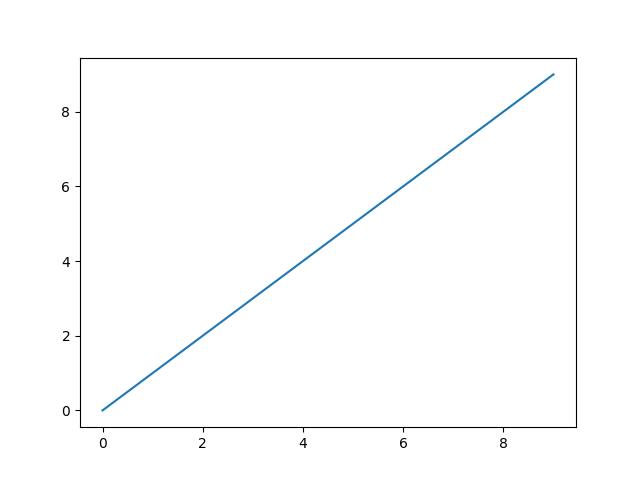

In [180]:
plt.plot(data)

<IPython.core.display.Javascript object>


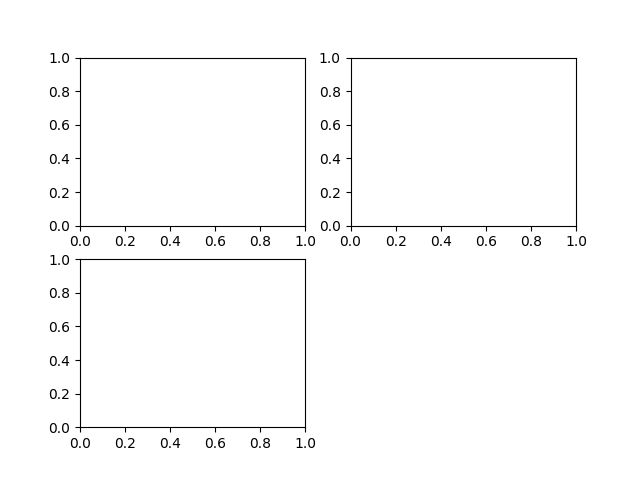

In [181]:
fig = plt.figure()

In [182]:
ax1 = fig.add_subplot(2, 2, 1)

In [183]:
ax2 = fig.add_subplot(2, 2, 2)

In [184]:
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


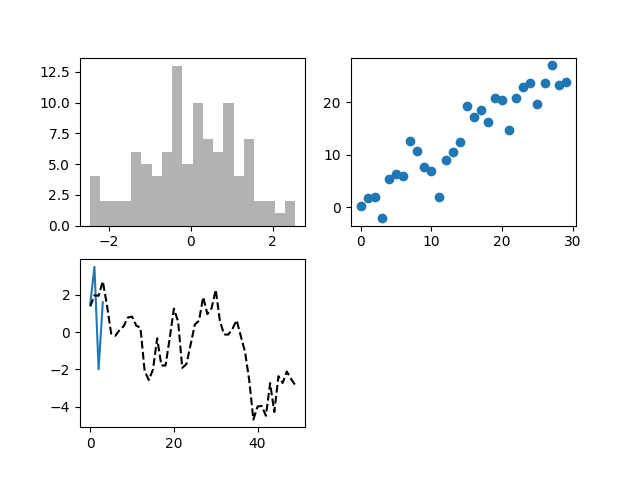

In [185]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [186]:
plt.plot([1.5, 3.5, -2, 1.6])

In [187]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [188]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [189]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


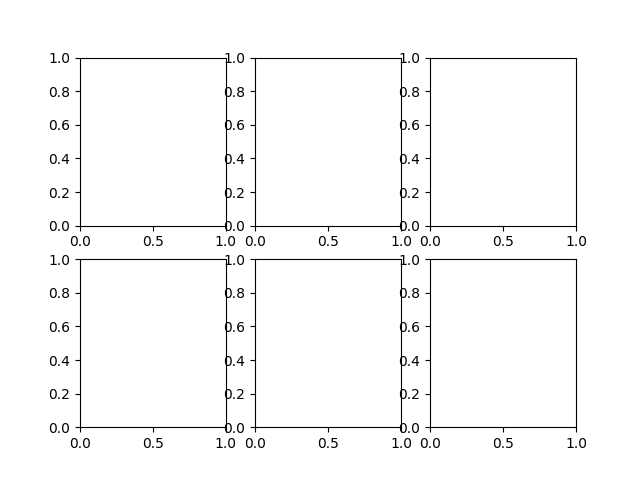

In [190]:
fig, axes = plt.subplots(2, 3)

In [191]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff741a0e730>,
      dtype=object)

In [192]:
axes[0, 1]

In [193]:
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

NameError: name 'subplots_adjust' is not defined

<IPython.core.display.Javascript object>


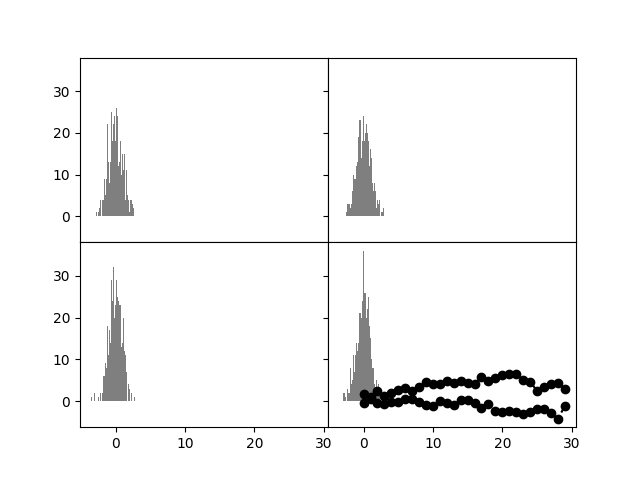

In [194]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [195]:
from numpy.random import randn

In [196]:
plt.plot(randn(30).cumsum(), 'ko--')

In [197]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [198]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


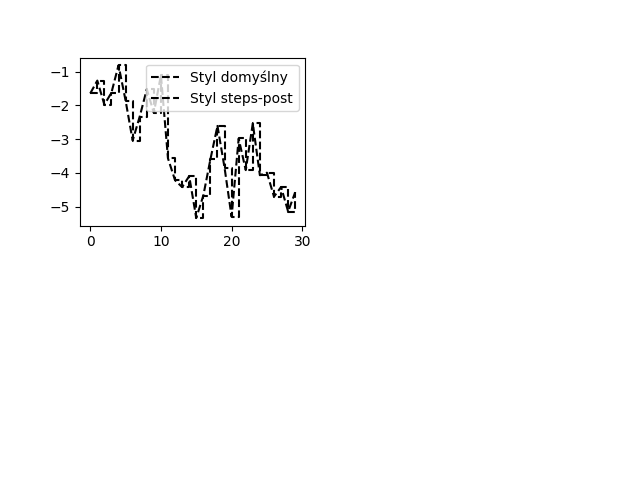

In [199]:
fig = plt.figure()
ax4 = fig.add_subplot(2, 2, 1)


In [200]:
plt.plot(data, 'k--', label='Styl domyślny')

In [201]:
plt.plot(data,'k--', drawstyle='steps-post', label='Styl steps-post')

In [202]:
plt.legend(loc='best')

<IPython.core.display.Javascript object>


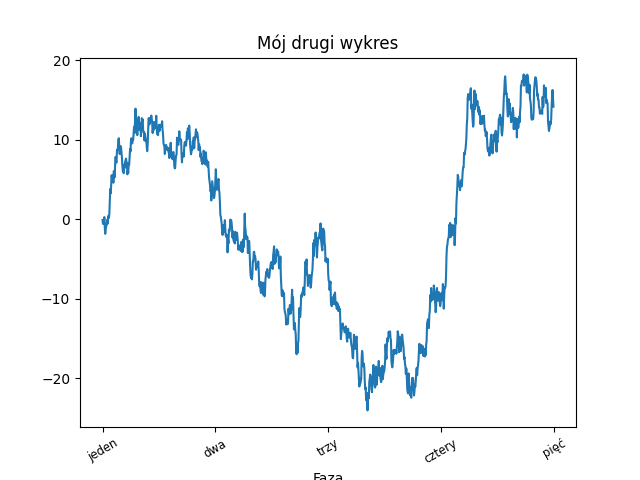

In [203]:
fig = plt.figure()

In [204]:
ax = fig.add_subplot(1, 1, 1)

In [205]:
ax.plot(np.random.randn(1000).cumsum())

In [206]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [207]:
labels = ax.set_xticklabels(['jeden', 'dwa', 'trzy', 'cztery', 'pięć'],
                           rotation=30, fontsize='small')

In [208]:
ax.set_title('Mój pierwszy wykres')

Text(0.5, 1.0, 'Mój pierwszy wykres')

In [209]:
ax.set_xlabel('Fazy')

Text(0.5, 8.326391973024522, 'Fazy')

In [210]:
props = {
    'title': 'Mój drugi wykres',
    'xlabel': 'Faza'
}
ax.set(**props)

[Text(0.5, 8.326391973024522, 'Faza'), Text(0.5, 1.0, 'Mój drugi wykres')]

<IPython.core.display.Javascript object>


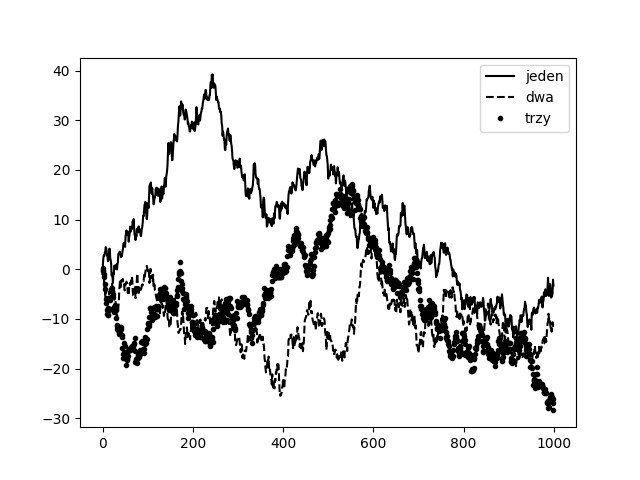

In [211]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [212]:
ax.plot(randn(1000).cumsum(), 'k', label='jeden')

In [213]:
ax.plot(randn(1000).cumsum(), 'k--', label='dwa')

In [214]:
ax.plot(randn(1000).cumsum(), 'k.', label='trzy')

In [215]:
ax.legend(loc='best')

In [216]:
ax.text(x, y, 'Witaj!',
       family='monospace', fontsize=10)

NameError: name 'x' is not defined

<IPython.core.display.Javascript object>


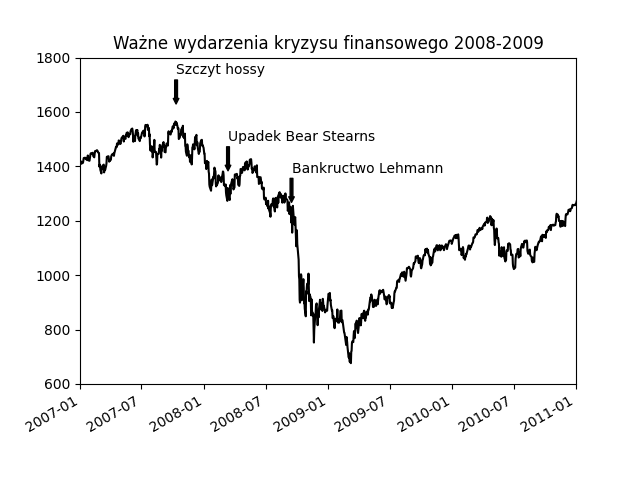

In [217]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [218]:
data = pd.read_csv('/users/karolkul/temp/pytand/przyklady/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

In [219]:
spx.plot(ax=ax, style='k-')

In [220]:
crisis_data = [
    (datetime(2007, 10, 11), 'Szczyt hossy'),
    (datetime(2008, 3, 12), 'Upadek Bear Stearns'),
    (datetime(2008, 9, 15), 'Bankructwo Lehmann')
]

In [221]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')

In [222]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

(600.0, 1800.0)

In [223]:
ax.set_title('Ważne wydarzenia kryzysu finansowego 2008-2009')

Text(0.5, 1.0, 'Ważne wydarzenia kryzysu finansowego 2008-2009')

<IPython.core.display.Javascript object>


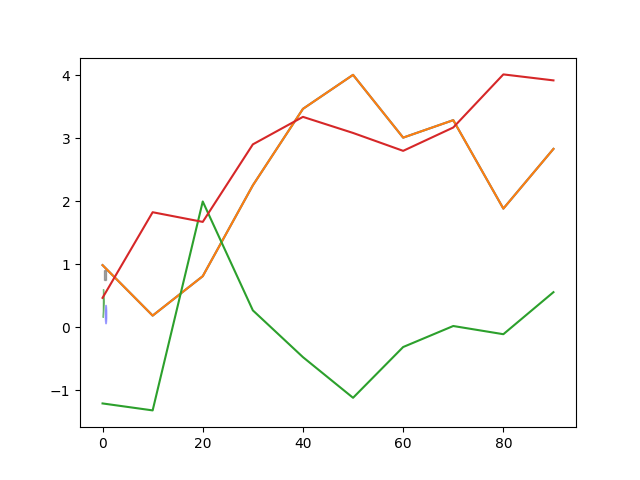

In [224]:
fig = plt.figure()

In [225]:
ax = fig.add_subplot(1, 1, 1)

In [226]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

In [227]:
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

In [228]:
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)

In [230]:
ax.add_patch(rect)

In [231]:
ax.add_patch(circ)

In [232]:
ax.add_patch(pgon)

In [233]:
plt.savefig('figpath.svg')

In [234]:
plt.savefig('Ścieżka.png', dpi=400, bbox_inches='tight')

In [235]:
from io import BytesIO

In [236]:
buffer = BytesIO()

In [237]:
plt.savefig(buffer)

In [238]:
plot_data= buffer.getvalue()

In [239]:
plt.rc('figure', figsize=(10, 10))

In [240]:
font_options = {'family': 'monospace',
               'weight': 'bold',
               'size': 'small'}
plt.rc('font', **font_options)

ValueError: Key font.size: Could not convert 'small' to float

In [246]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [247]:
s.plot()

In [248]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


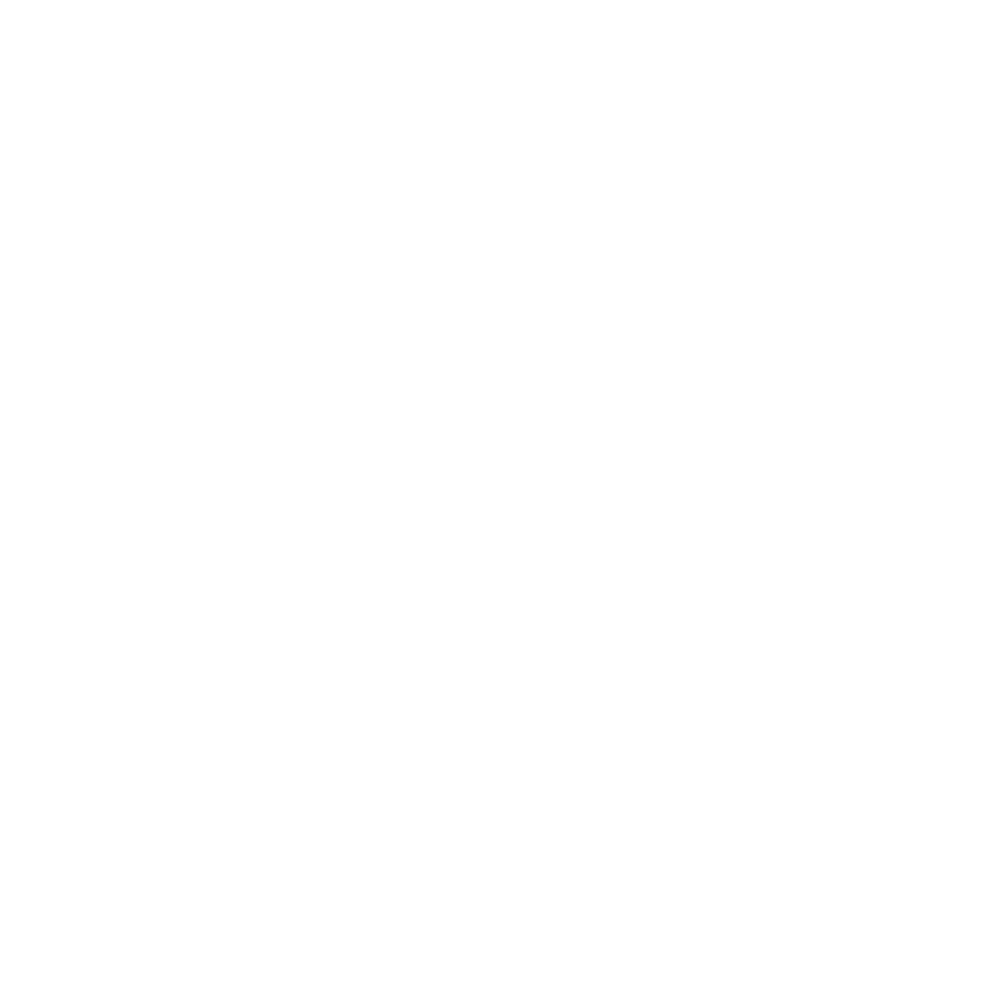

In [249]:
fig = plt.figure()

<IPython.core.display.Javascript object>


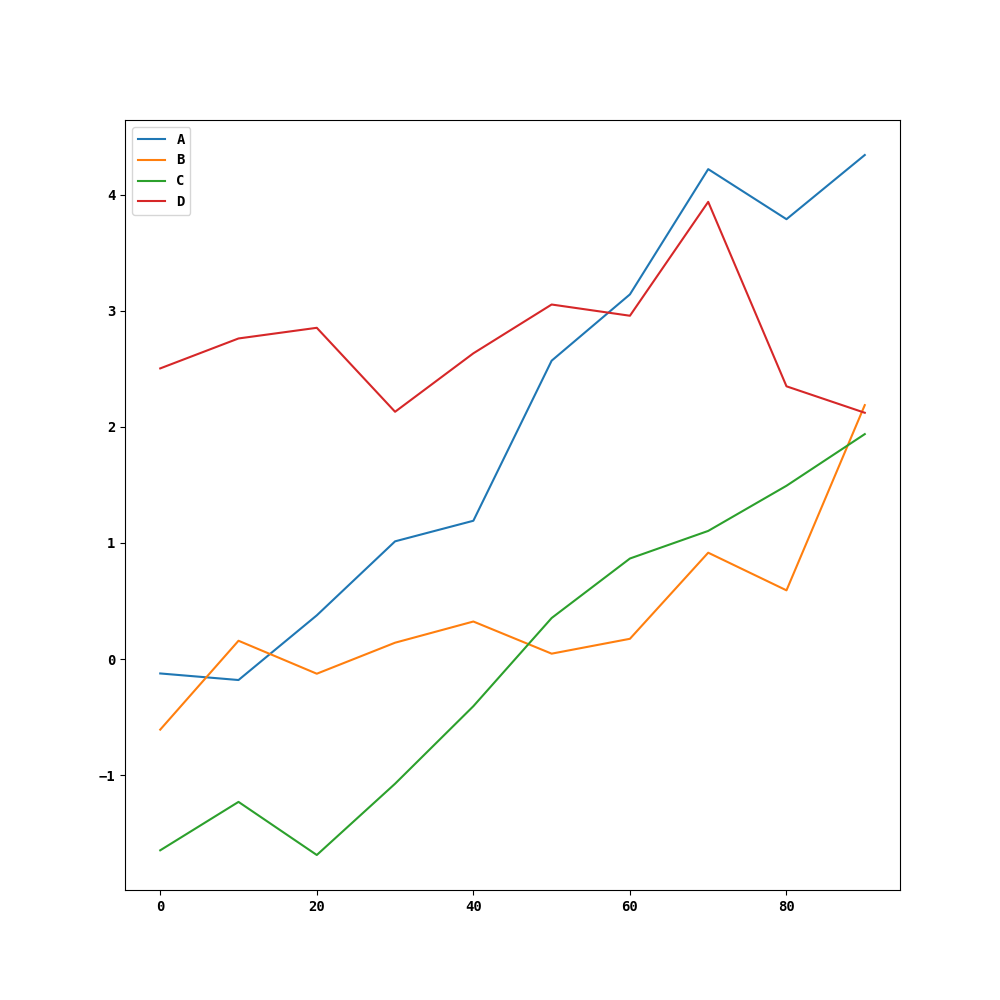

In [250]:
df.plot()

<IPython.core.display.Javascript object>


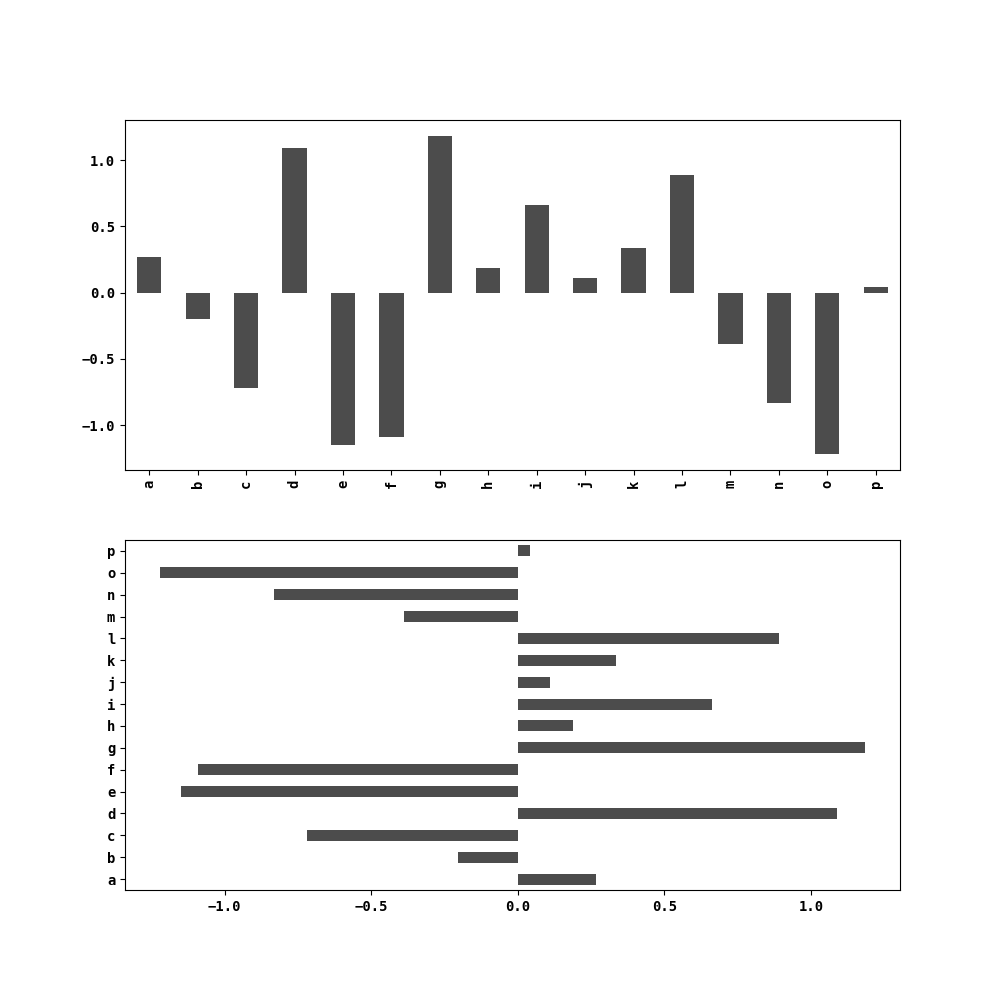

In [252]:
fig, axes = plt.subplots(2, 1)

In [254]:
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

In [255]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [256]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [257]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['jeden', 'dwa', 'trzy', 'cztery', 'pięć', 'sześć'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Rodzaj'))

In [258]:
df

Rodzaj,A,B,C,D
jeden,0.412742,0.321525,0.209190,0.835484
dwa,0.825965,0.760426,0.280646,0.222170
trzy,0.770402,0.972787,0.044975,0.006525
cztery,0.126051,0.423522,0.858057,0.258158
pięć,0.424700,0.630545,0.214204,0.436829
sześć,0.135177,0.150025,0.505933,0.668098


<IPython.core.display.Javascript object>


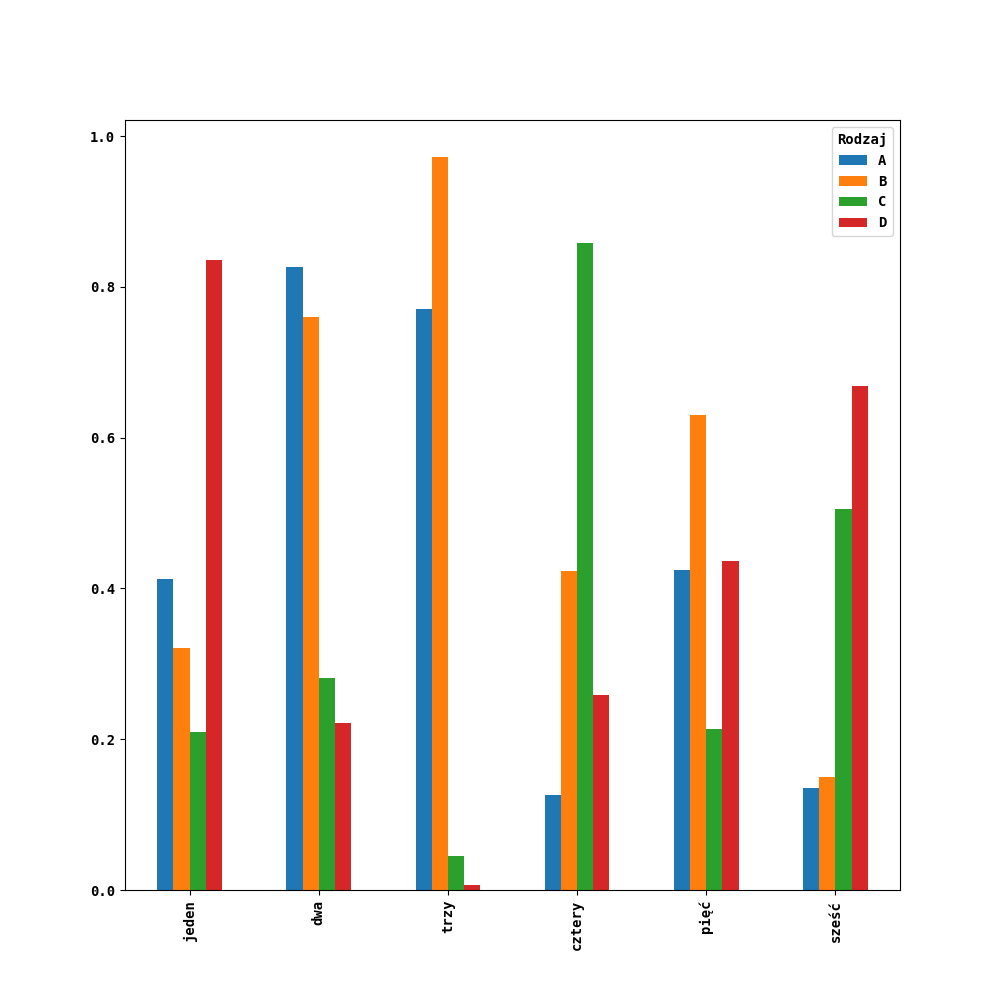

In [259]:
df.plot.bar()

<IPython.core.display.Javascript object>


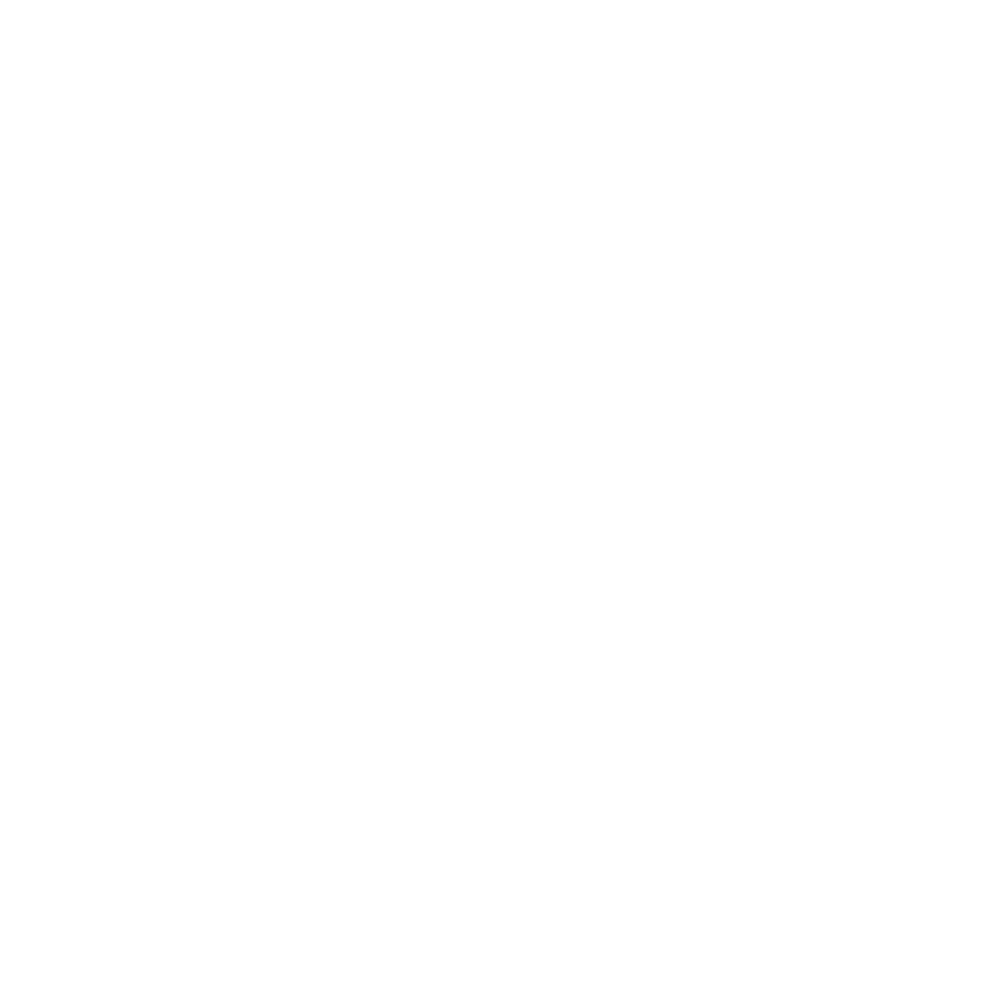

In [261]:
fig = plt.figure()

<IPython.core.display.Javascript object>


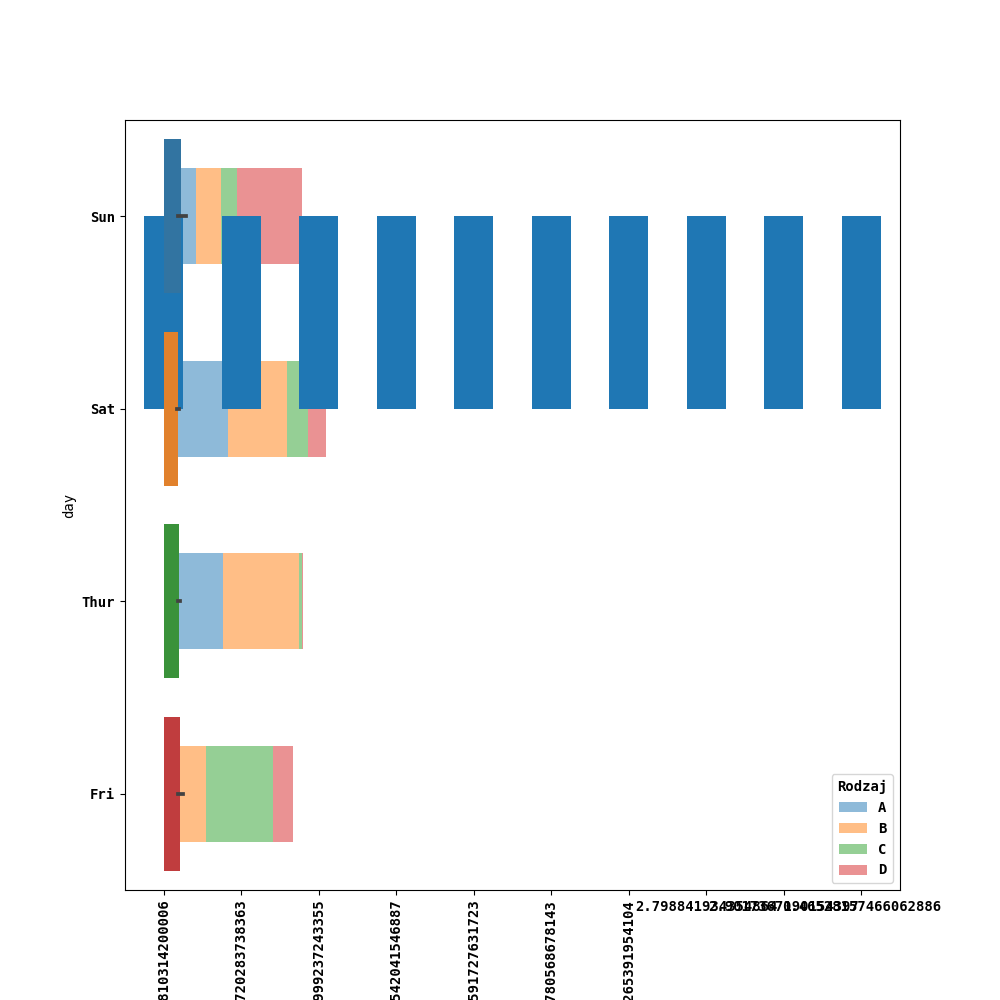

In [262]:
df.plot.barh(stacked=True, alpha=0.5)

In [264]:
s.value_counts().plot.bar()

In [266]:
tips = pd.read_csv('/users/karolkul/temp/pytand/przyklady/tips.csv')

In [267]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [268]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [269]:
party_counts = party_counts.loc[:, 2:5]

In [270]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [271]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [273]:
import seaborn as sns

In [274]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [275]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [278]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


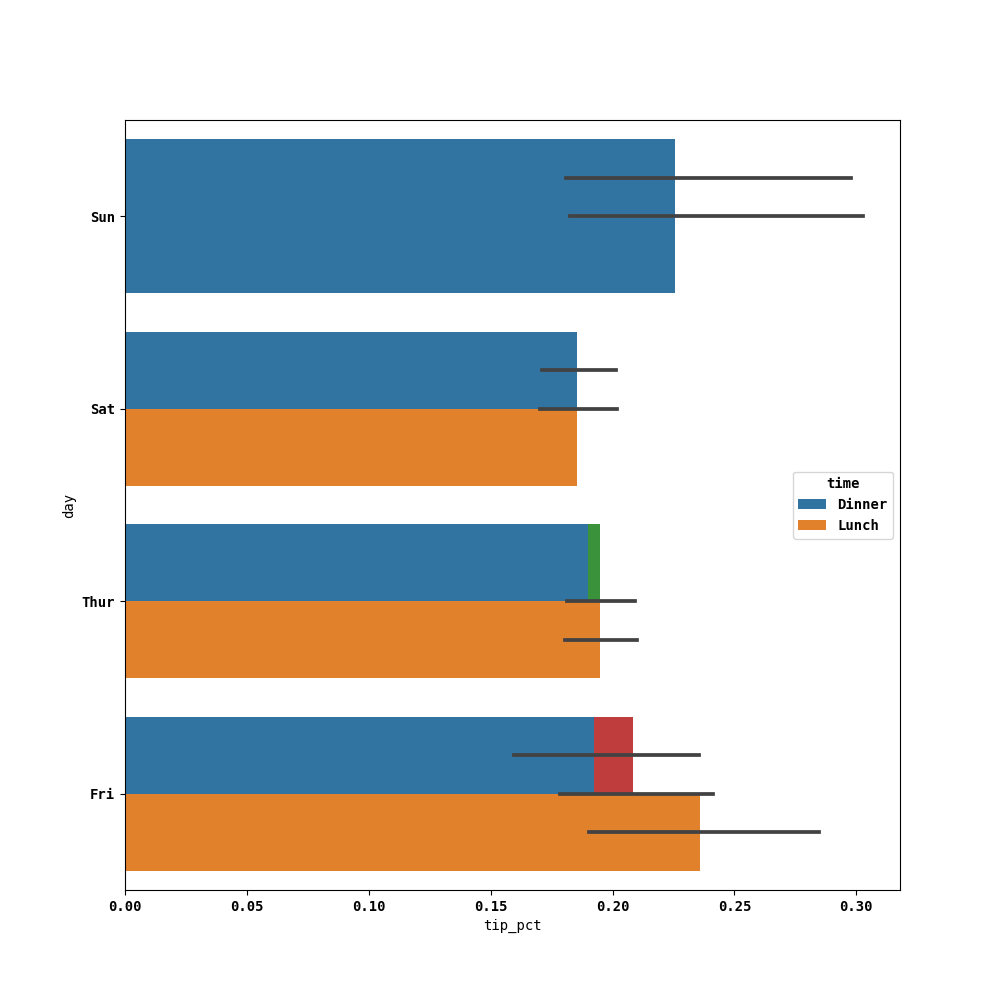

In [277]:
fig = plt.figure()

In [280]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [281]:
sns.set(style='whitegrid')

<IPython.core.display.Javascript object>


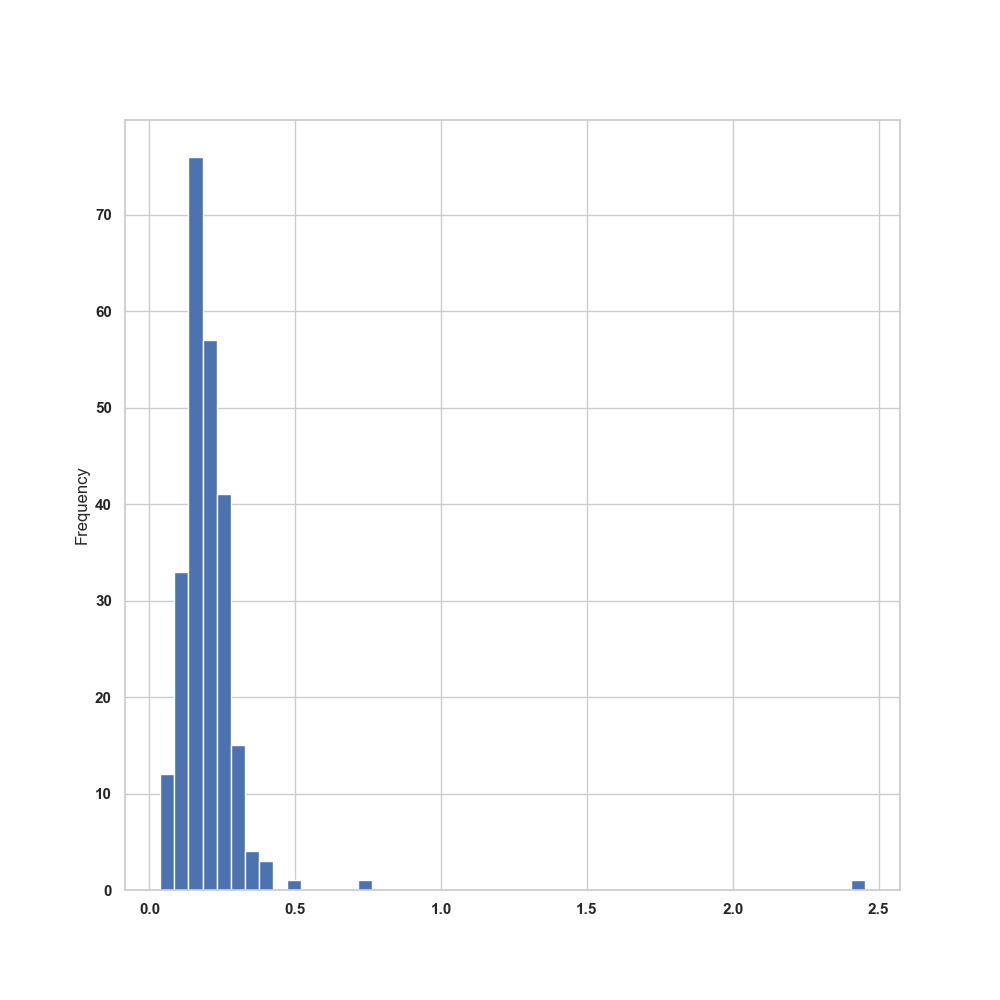

In [282]:
fig = plt.figure()

In [283]:
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


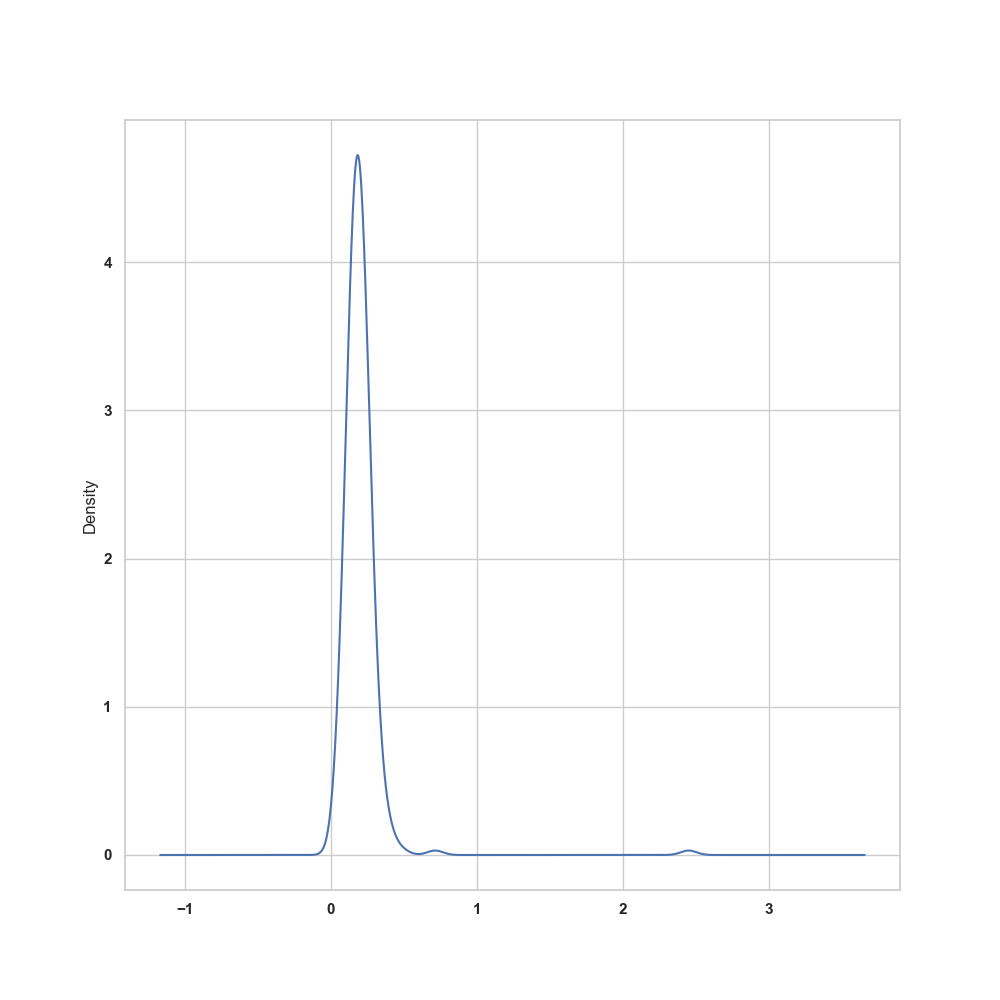

In [284]:
fig = plt.figure()

In [285]:
tips['tip_pct'].plot.density()

In [287]:
comp1 = np.random.normal(0, 1, size=200)

In [288]:
comp2 = np.random.normal(10, 2, size=200)

In [289]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


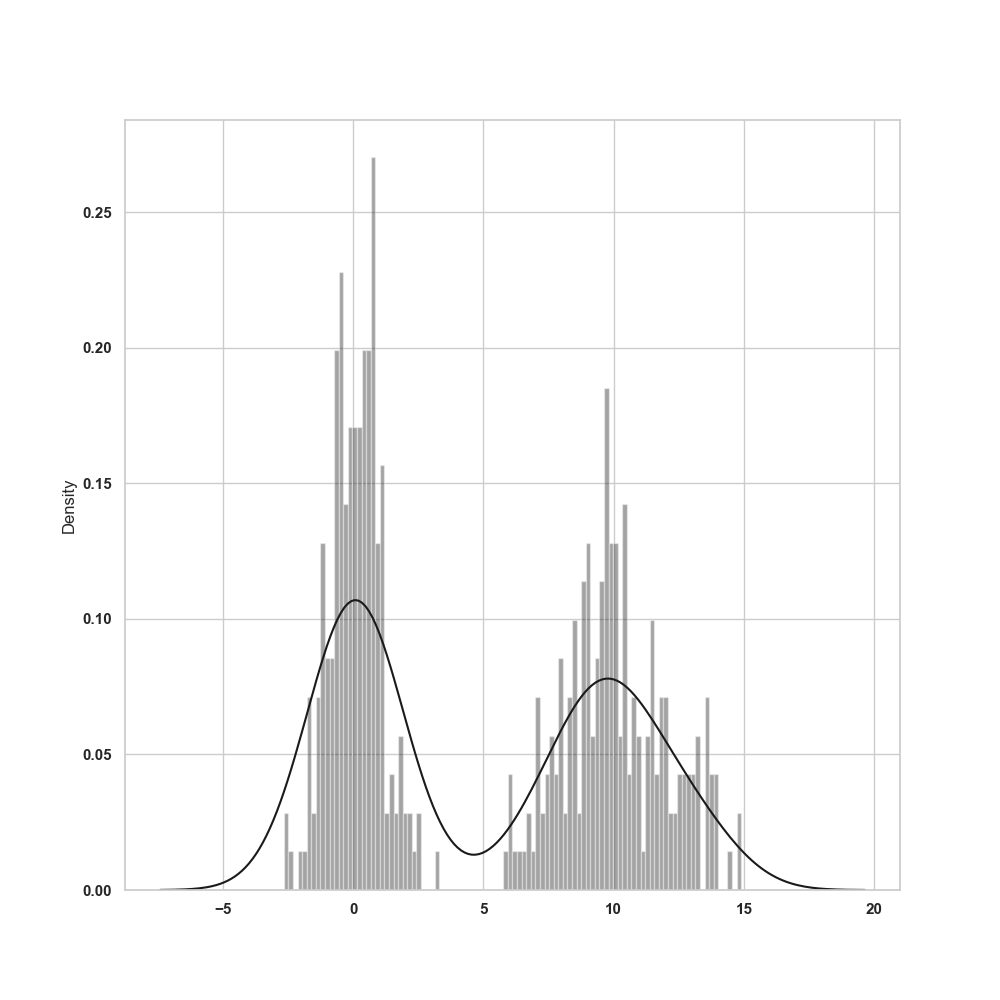

In [290]:
fig = plt.figure()

In [291]:
sns.distplot(values, bins=100, color='k')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [292]:
macro = pd.read_csv('/users/karolkul/temp/pytand/przyklady/macrodata.csv')

In [293]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [294]:
trans_data = np.log(data).diff().dropna()

In [295]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<ipython-input-296-62f7b9d6e299>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


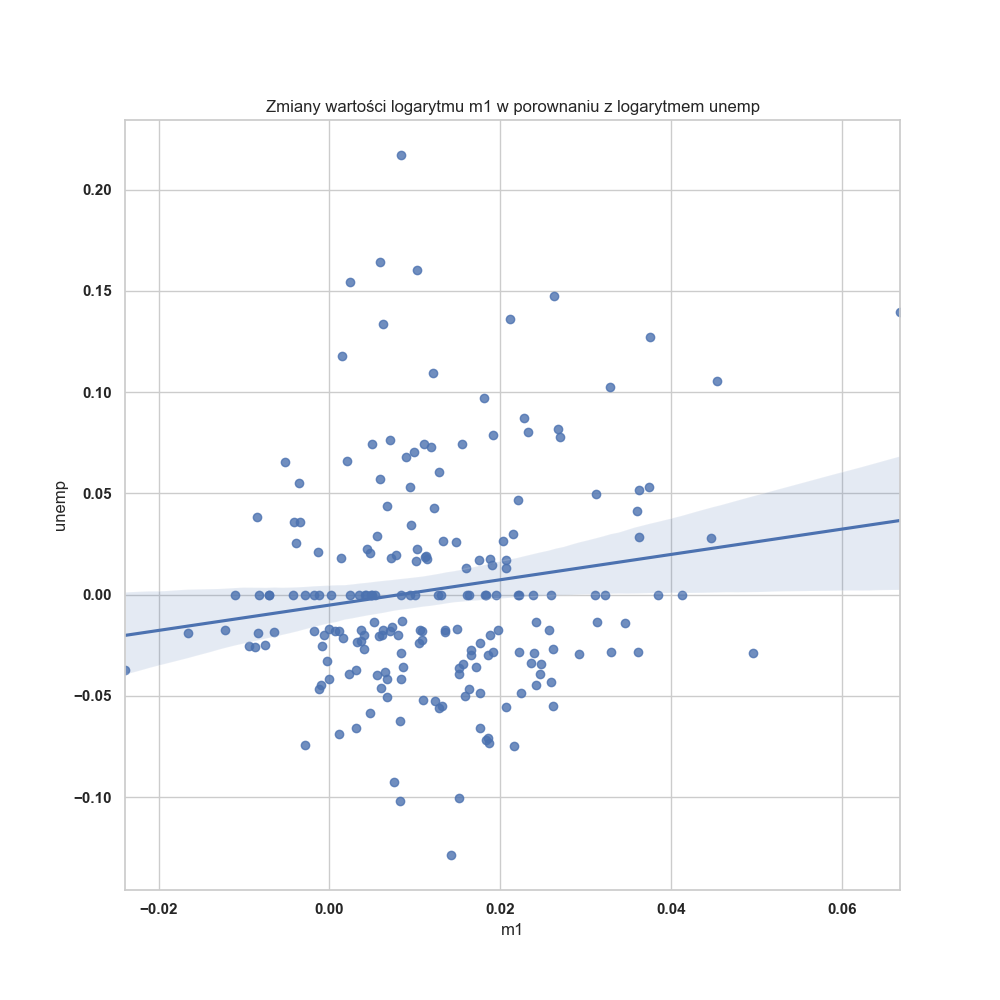

In [296]:
fig = plt.figure()

In [297]:
sns.regplot('m1', 'unemp', data=trans_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [298]:
plt.title('Zmiany wartości logarytmu %s w porownaniu z logarytmem %s' %('m1', 'unemp'))

Text(0.5, 1.0, 'Zmiany wartości logarytmu m1 w porownaniu z logarytmem unemp')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1176: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


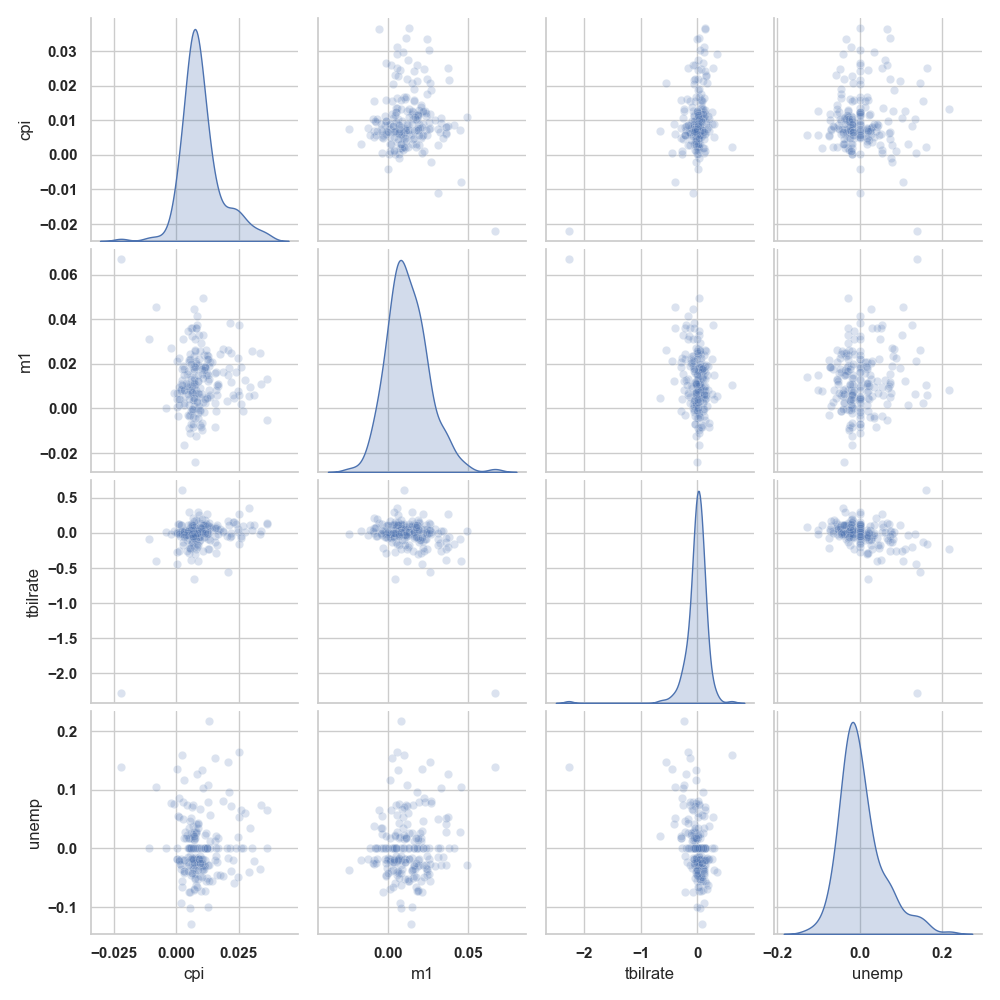

In [299]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})